In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving SPY230204.csv to SPY230204.csv


{'SPY230204.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-05-05,417.380005,417.630005,415.149994,415.750000,405.053528,60162200\n2021-05-06,415.829987,419.209991,413.679993,419.070007,408.288055,74321400\n2021-05-07,419.890015,422.820007,419.160004,422.119995,411.259552,67733800\n2021-05-10,422.500000,422.739990,417.809998,417.940002,407.187103,81852400\n2021-05-11,413.100006,415.269989,410.059998,414.209991,403.553101,116888000\n2021-05-12,411.230011,412.589996,404.000000,405.410004,394.979553,134811000\n2021-05-13,407.070007,412.350006,407.019989,410.279999,399.724243,106394000\n2021-05-14,413.209991,417.489990,413.179993,416.579987,405.862122,82201600\n2021-05-17,415.390015,416.390015,413.359985,415.519989,404.829437,65129200\n2021-05-18,415.799988,416.059998,411.769989,411.940002,401.341492,59810200\n2021-05-19,406.920013,411.049988,405.329987,410.859985,400.289307,106467100\n2021-05-20,411.799988,416.630005,411.670013,415.279999,404.595551,78022200\n2021-05-21,416.869995

In [3]:
df = pd.read_csv('SPY230204.csv', sep=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-05,417.380005,417.630005,415.149994,415.750000,405.053528,60162200
1,2021-05-06,415.829987,419.209991,413.679993,419.070007,408.288055,74321400
2,2021-05-07,419.890015,422.820007,419.160004,422.119995,411.259552,67733800
3,2021-05-10,422.500000,422.739990,417.809998,417.940002,407.187103,81852400
4,2021-05-11,413.100006,415.269989,410.059998,414.209991,403.553101,116888000
...,...,...,...,...,...,...,...
437,2023-01-30,402.799988,405.130005,400.279999,400.589996,400.589996,74202000
438,2023-01-31,401.130005,406.529999,400.769989,406.480011,406.480011,86811800
439,2023-02-01,405.209991,413.670013,402.350006,410.799988,410.799988,101459200
440,2023-02-02,414.859985,418.309998,412.880005,416.779999,416.779999,101654500


In [4]:
df = df.drop(columns = 'Adj Close')

In [5]:
df.set_index('Date',inplace=True)

In [6]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-05,417.380005,417.630005,415.149994,415.750000,60162200
2021-05-06,415.829987,419.209991,413.679993,419.070007,74321400
2021-05-07,419.890015,422.820007,419.160004,422.119995,67733800
2021-05-10,422.500000,422.739990,417.809998,417.940002,81852400
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000
...,...,...,...,...,...
2023-01-30,402.799988,405.130005,400.279999,400.589996,74202000
2023-01-31,401.130005,406.529999,400.769989,406.480011,86811800
2023-02-01,405.209991,413.670013,402.350006,410.799988,101459200


In [7]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [23]:
df = df[['Open','High','Low','Volume', 'Close']]
df = MinMaxScaler(df)


In [24]:
target = df[['Close']]
features = df[['Open','High','Low','Volume']]


In [25]:
X = features.values.tolist()
y = target.values.tolist()

In [49]:
window_size = 20

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size]
    _y = y[i + window_size]
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.2500577453612552, 0.18325556132367016, 0.23954686879199721, 0.20984186748689754], [0.25690324902143813, 0.24492336880670948, 0.24462693079630501, 0.33220212576020886], [0.3165910376311863, 0.28195742213693914, 0.3091834618968084, 0.1963161927060615], [0.29259292396593695, 0.2565744502999731, 0.29824150131329696, 0.15735371556035674], [0.33089775138783706, 0.2977696219968757, 0.33817909784958033, 0.17327770708985996], [0.36504898325517454, 0.321820753000457, 0.3463073346101907, 0.2694481295072963], [0.34158911276017206, 0.3268974505635859, 0.3534975097239751, 0.15059765818336315], [0.37897097278973274, 0.3363016196834502, 0.38257137935377056, 0.14523647556822156], [0.3830475742728983, 0.3353860404869946, 0.3373974957412488, 0.31227340630134437], [0.30882232813548555, 0.26015295383965487, 0.3059790620685761, 0.25498952487925913], [0.31451435907549397, 0.3014314311262579, 0.31473244139902307, 0.27571828592220604], [0.36543347672580495, 0.3564412911001225, 0.3720985629191782, 0.2424234

In [50]:
train_size = int(len(data_y) * 0.75)
X_train = np.array(data_X[0 : train_size])
y_train = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
X_test = np.array(data_X[train_size : len(data_X)])
y_test = np.array(data_y[train_size : len(data_y)])

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [55]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(20, 4)))
model.add(Dropout(0.5))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 20, 20)            2000      
                                                                 
 dropout_10 (Dropout)        (None, 20, 20)            0         
                                                                 
 lstm_11 (LSTM)              (None, 20)                3280      
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=80, batch_size=40)
y_pred = model.predict(X_test)

Epoch 1/80
8/8 [==============================] - 2s 21ms/step - loss: 0.0097
Epoch 2/80
8/8 [==============================] - 0s 18ms/step - loss: 0.0108
Epoch 3/80
8/8 [==============================] - 0s 20ms/step - loss: 0.0100
Epoch 4/80
8/8 [==============================] - 0s 21ms/step - loss: 0.0102
Epoch 5/80
8/8 [==============================] - 0s 19ms/step - loss: 0.0098
Epoch 6/80
8/8 [==============================] - 0s 20ms/step - loss: 0.0092
Epoch 7/80
8/8 [==============================] - 0s 19ms/step - loss: 0.0102
Epoch 8/80
8/8 [==============================] - 0s 20ms/step - loss: 0.0095
Epoch 9/80
8/8 [==============================] - 0s 19ms/step - loss: 0.0103
Epoch 10/80
8/8 [==============================] - 0s 20ms/step - loss: 0.0094
Epoch 11/80
8/8 [==============================] - 0s 31ms/step - loss: 0.0109
Epoch 12/80
8/8 [==============================] - 0s 30ms/step - loss: 0.0096
Epoch 13/80
8/8 [==============================] - 0s 28ms/st

4/4 [==============================] - 0s 6ms/step


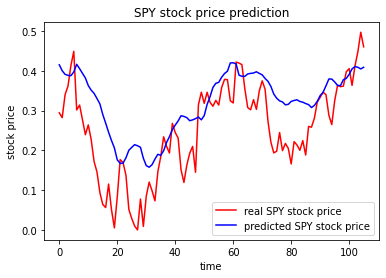

내일 SPY 주가 : [0.4089152]


In [63]:
y_pred = model.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real SPY stock price')
plt.plot(y_pred, color='blue', label='predicted SPY stock price')
plt.title('SPY stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SPY 주가 :", df.Close[-1] * y_pred[-1] / df.Close[-1])